Enter           enter edit mode                 Shift-­Enter     run cell, select below
Ctrl-Enter      run cell                        Alt-Enter       run cell, insert below
Y               to code                         M               to markdown
R               to raw                          1               to heading 1
2,3,4,5,6       to heading 2,3,4,5,6            Up/K            select cell above
Down/J          select cell below               A/B             insert cell above/­below
X               cut selected cell               C               copy selected cell
Shift-V         paste cell above                V               paste cell below
Z               undo last cell deletion         D,D             delete selected cell
Shift-M         merge cell below                Ctrl-S          Save and Checkpoint
L               toggle line numbers             O               toggle output
Shift-O         toggle output scrolling         Esc             close pager
H               show keyboard shortcut help     I,I             interrupt kernel
0,0             restart kernel                  Space           scroll down
Shift-­Space     scroll up                       Shift           ignore

Edit Mode (press Enter to enable)
Tab                 code completion or indent   Shift-Tab           tooltip
Ctrl-]              indent                      Ctrl-[              dedent
Ctrl-A              select all                  Ctrl-Z              undo
Ctrl-S­hift-Z        redo                        Ctrl-Y              redo
Ctrl-Home           go to cell start            Ctrl-Up             go to cell start
Ctrl-End            go to cell end              Ctrl-Down           go to cell end
Ctrl-Left           go one word left            Ctrl-Right          go one word right
Ctrl-B­ack­space      delete word before          Ctrl-D­elete         delete word after
Esc                 command mode                Ctrl-M              command mode
Shift-­Enter         run cell, select below      Ctrl-Enter          run cell
Alt-Enter           run cell, insert below      Ctrl-S­hif­t-S­ubtract split cell
Ctrl-S­hift--        split cell                  Ctrl-S              Save and Checkpoint
Ctrl-/              toggle comment on current or selected lines

In [169]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn import linear_model
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

path = '/home/collin/machine_learning/CS6140ML18Fall-smith.colin/midterm/data/'
data_file = 'boston-home-data-only.txt' 
output_file = 'boston_home_data.csv'

In [170]:
data = pd.read_csv(path+data_file, delim_whitespace=True)

In [171]:
data.info()

In [172]:
data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [173]:
nox_y = data['NOX']
medv_y = data['MEDV']

## Now that Y's are set 

## I set up a standardized version and a series of normalizers, l1, l2, and max.



In [174]:
scaler = StandardScaler()
cols = data.columns.tolist()
datax = pd.DataFrame(scaler.fit_transform(data))
datax.columns = cols

In [175]:
medv_x = data.drop(columns=['MEDV'])
nox_x = data.drop(columns=['NOX'])
medv2_x = data.drop(columns=['MEDV', 'DIS', 'CHAS', 'B'])
nox2_x = data.drop(columns=['NOX', 'CHAS', 'PTRATIO'])

l2_medv_x = pd.DataFrame(normalize(medv_x))
l2_medv2_x = pd.DataFrame(normalize(medv2_x))

l1_medv_x = pd.DataFrame(normalize(medv_x, norm='l1'))
l1_medv2_x = pd.DataFrame(normalize(medv2_x, norm='l1'))

max_medv_x = pd.DataFrame(normalize(medv_x, norm='max'))
max_medv2_x = pd.DataFrame(normalize(medv2_x, norm='max'))

l2_nox_x = pd.DataFrame(normalize(nox_x))
l2_nox2_x = pd.DataFrame(normalize(nox2_x))

l1_nox_x = pd.DataFrame(normalize(nox_x, norm='l1'))
l1_nox2_x = pd.DataFrame(normalize(nox2_x, norm='l1'))

max_nox_x = pd.DataFrame(normalize(nox_x, norm='max'))
max_nox2_x = pd.DataFrame(normalize(nox2_x, norm='max'))

In [205]:
medv_t_sets = []
nox_t_sets = []
mvn_l = []
nn_l =[]

TEST_DESC = 0
X_TRAIN = 1
Y_TRAIN = 2
X_TEST = 3
Y_TEST = 4

In [226]:
from funkys_funcs import append_tts

a,b,c,d = train_test_split(medv_x, medv_y, test_size=.2, random_state=17)
MEDV = append_tts(a,b,c,d, 'medv:  ', medv_t_sets)

q,w,e,r = train_test_split(nox_x, nox_y, test_size=.2, random_state=17)
NOX = append_tts(q,w,e,r, 'nox:   ', nox_t_sets)

mvn_l.append(MEDV)
nn_l.append(NOX)

In [178]:
a,b,c,d = train_test_split(medv2_x, medv_y, test_size=.2, random_state=17)
MEDV2 = append_tts(a,b,c,d, 'medv2:  ', medv_t_sets)

q,w,e,r = train_test_split(nox2_x, nox_y, test_size=.2, random_state=17)
NOX2 = append_tts(q,w,e,r, 'nox2:   ', nox_t_sets)

mvn_l.append(MEDV2)
nn_l.append(NOX2)

In [179]:
a,b,c,d = train_test_split(l2_medv_x, medv_y, test_size=.2, random_state=17)
L2MV = append_tts(a,b,c,d, 'l2_medv:  ', medv_t_sets)

q,w,e,r = train_test_split(l2_nox_x, nox_y, test_size=.2, random_state=17)
L2NOX = append_tts(q,w,e,r, 'l2_nox:   ', nox_t_sets)

mvn_l.append(MEDV2)
nn_l.append(NOX2)

In [180]:
a,b,c,d = train_test_split(l2_medv2_x, medv_y, test_size=.2, random_state=17)
L2MV2 = append_tts(a,b,c,d, 'l2_medv2:  ', medv_t_sets)

q,w,e,r = train_test_split(l2_nox2_x, nox_y, test_size=.2, random_state=17)
L2NOX2 = append_tts(q,w,e,r, 'l2_nox2:   ', nox_t_sets)

In [181]:
a,b,c,d = train_test_split(l1_medv_x, medv_y, test_size=.2, random_state=17)
L1MV = append_tts(a,b,c,d, 'l1_medv:  ', medv_t_sets)

q,w,e,r = train_test_split(l1_nox_x, nox_y, test_size=.2, random_state=17)
L1NOX = append_tts(q,w,e,r, 'l1_nox:   ', nox_t_sets)

In [182]:
a,b,c,d = train_test_split(l1_medv2_x, medv_y, test_size=.2, random_state=17)
L1MV2 = append_tts(a,b,c,d, 'l1_medv2:  ', medv_t_sets)

q,w,e,r = train_test_split(l1_nox2_x, nox_y, test_size=.2, random_state=17)
L1NOX2 = append_tts(q,w,e,r, 'l1_nox2:   ', nox_t_sets)

In [183]:
a,b,c,d = train_test_split(max_medv_x, medv_y, test_size=.2, random_state=17)
mvn_l.append(MAXMV = append_tts(a,b,c,d, 'max_medv:  ', medv_t_sets))

q,w,e,r = train_test_split(max_nox_x, nox_y, test_size=.2, random_state=17)
MAXNOX = append_tts(q,w,e,r, 'max_nox:   ', nox_t_sets)

In [184]:
a,b,c,d = train_test_split(max_medv2_x, medv_y, test_size=.2, random_state=17)
mvn_l.append(MAXMV2 = append_tts(a,b,c,d, 'max_medv2:  ', medv_t_sets))

q,w,e,r = train_test_split(max_nox2_x, nox_y, test_size=.2, random_state=17)
MAXNOX2 = append_tts(q,w,e,r, 'max_nox2:   ', nox_t_sets)

## This is a clean dataset. There is very little cross correlation. Seems like there is very little correlation actually. For this dataset I will keep the full dataset and use a second dataset where I will try to drop out some noise from medv and nox.

## Going to start with Median Value first.

## So Baseline.

In [227]:
hist_y = []
total = 0
for i in range (52):
    hist_y.append(0)
for i in range (len(medv_y)):
    hist_y[int(medv_y[i])] += 1
    total
    
print(hist_y)

[0, 0, 0, 0, 0, 3, 1, 7, 10, 3, 10, 9, 9, 24, 18, 16, 16, 22, 25, 37, 36, 31, 35, 37, 25, 11, 8, 9, 10, 10, 7, 8, 7, 9, 5, 4, 6, 5, 1, 1, 0, 2, 2, 3, 2, 1, 2, 0, 3, 0, 16, 0]


In [229]:
print((31+35+37+37+36) / 506)
print((31+35+37+37+36+25+25) / 506)

0.34782608695652173
0.44664031620553357


## +/-2 gets us 34.7% 

## +/-3 gets us 44.6%

## Lets start with linear and logistic regressions.

In [187]:
lin = linear_model.LinearRegression()
log = linear_model.LogisticRegression()

In [188]:
medv1_x_train, medv1_x_test, medv1_y_train, medv1_y_test = train_test_split(medv_x, medv_y, test_size=0.2, random_state=4)
medv2_x_train, medv2_x_test, medv2_y_train, medv2_y_test = train_test_split(medv2_x, medv_y, test_size=0.2, random_state=4)

medv1_nx_train, medv1_nx_test, medv1_ny_train, medv1_ny_test = train_test_split(l2_medv_x, medv_y, test_size=0.2, random_state=4)
medv2_nx_train, medv2_nx_test, medv2_ny_train, medv2_ny_test = train_test_split(l2_medv2_x, medv_y, test_size=0.2, random_state=4)


In [189]:
lin_medv1_pred = lin.fit(medv1_x_train, medv1_y_train).predict(medv1_x_test)
lin_medv2_pred = lin.fit(medv2_x_train, medv2_y_train).predict(medv2_x_test)


## Basic linear regression to predict median value.

### Plotting the results below the complete dataset did better setting up the model. There were a few outliers at the far end and there was a general tendancy to guess low at the high end of the values. 

### There is a bit better than smartest dumb solution correlation.

In [190]:
from result_lib import Result

res_medv1_lin = Result(lin_medv1_pred, medv1_y_test.values, 1)
res_medv2_lin = Result(lin_medv2_pred, medv2_y_test.values, 1)

Range: 1
Correct: 22
Mean Variance: 3.367790983796587


3.0504732184884134

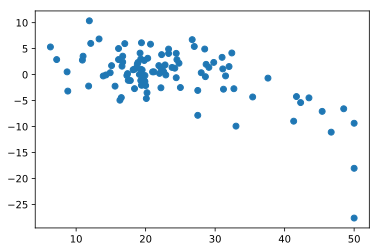

In [191]:
res_medv1_lin.display_totals()
plt.plot(medv1_y_test, res_medv1_lin.list_variances, 'o')
res_medv1_lin.get_confidence_interval(60)

Range: 1
Correct: 26
Mean Variance: 3.470227459420825


3.033927400961545

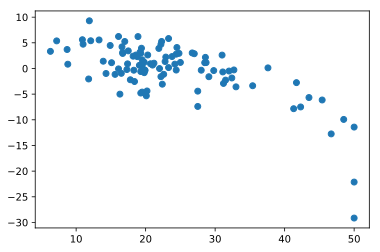

In [192]:
res_medv2_lin.display_totals()
plt.plot(medv2_y_test, res_medv2_lin.list_variances, 'o')
res_medv2_lin.get_confidence_interval(57)


## Basic Logisitic Regression to predict median value.

### I am getting a an unknown label 'continuous' error here. Still trying to figure it out.

In [193]:
# log_medv1_pred = log.fit(medv1_nx_train, medv1_ny_train).predict(medv1_nx_test)
# log_medv2_pred = log.fit(medv2_nx_train, medv2_ny_train).predict(medv2_nx_test)

In [194]:
# res_medv1_log = Result(log_medv1_pred, medv_y_test.values, 1)
# res_medv2_log = Result(log_medv2_pred, medv_y_test.values, 1)

In [195]:
# len(medv_t_sets)

In [196]:
# svm_temp = svm.SVC(kernel='poly', C=2)
# y_pred = svm_temp.fit(medv_t_sets[4][X_TRAIN], medv_t_sets[4][Y_TRAIN]).predict(medv_t_sets[4][X_TEST])

medv1_x_train, medv1_x_test, medv1_y_train, medv1_y_test = train_test_split(medv_x, medv_y, test_size=0.2, random_state=4)
medv2_x_train, medv2_x_test, medv2_y_train, medv2_y_test = train_test_split(medv2_x, medv_y, test_size=0.2, random_state=4)


In [197]:
# kernals = ['linear', 'rbf', 'sigmoid']

# for krnl in kernals:
#     for power in range(-3, 10):
#         for i in range(2):
#             svm_temp = svm.SVC(kernel=krnl, C=2**power).fit(x_trains[i], y_trains[i])
#             y_pred=svm_temp.predict(x_test)
#             res_temp = Result(y_pred, y_test.values, 1)
#             print('Kernal: ' + krnl + '  C: 2**' + str(power) + 'dataset #: ' + str(i + 1))
#             res_temp.display_totals()

## The NOX column has a mean of .55 and a standard deviation of .11. Rather than just run a histogram or some other method I am just going to infer that if you guess:

### .55 with a .11 range and be right 66% of the time. 

In [214]:
nox1_pred = lin.fit(nox_t_sets[0][X_TRAIN], nox_t_sets[0][Y_TRAIN]).predict(nox_t_sets[0][X_TEST])


In [215]:
res_nox1_lin = Result(nox1_pred, nox_t_sets[0][Y_TEST].values, .011)
# res_nox2_lin = Result(nox2_pred, nox1_y_test.values, 1)


In [216]:
res_nox1_lin.display_totals()

Range: 0.011
Correct: 18
Mean Variance: 0.042551283529728076


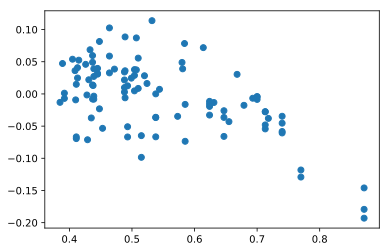

In [217]:
plt.plot(nox_t_sets[0][Y_TEST], res_nox1_lin.list_variances, 'o')

In [213]:
res_nox1_lin.get_confidence_interval(66)

0.04889386876208801

## This Model actually outperforms smartest dumbby a lot.